# Introduction to NoSql - MongoDB
Agenda today:
- Introduction to nosql and different types of non-relational databases
- Working with MongoDB 
    - Creating a database and inserting entries 
    - Working on acquiring Tweets and store them in a MongoDB

## Part I. What is NoSql Databases?
SQL databases store _tables_ with rows and columns, and NoSQL databases store non-relational data in _document_ formats. The differences between them are rooted in the way they are designed, which data types they support, and how they store them. Relational databases are relationally structured entities, usually representing a real-world object; for example, a person or shopping cart details. Non-relational databases are document-structured and distributed, holding information in a folder-like Hierarchy which holds the data in an unstructured format. 

#### Reasons why we need NoSQL databases:
1. 1. Storing large volumes of data without structure. A NoSQL database doesn’t limit storable data types. Plus, you can add new types as business needs change.

2. 2. Using cloud computing and storage. Cloud-based storage is a great solution, but it requires data to be easily spread across multiple servers for scaling. Using affordable hardware on-site for testing and then for production in the cloud is what NoSQL databases are designed for.

3. 3. Rapid development. If you are developing using modern agile methodologies, a relational database will slow you down. A NoSQL database doesn’t require the level of preparation typically needed for relational databases.


#### Types of Non-Relational Databases
1. Key-Value stores
    - Amazon DynamoDB
2. Graph Databases
    - Neo4j
    - Orient DB
    - Apache Giraph
3. RDDs and Big Data
    - Spark RDD 
    - Hadoop
    - Hive

#### Advantages of NoSQL:
- Schemaless − Number of fields, content and size of the document can differ from one document to another.
- You can store virtually any kind of data - be structured, partially structured, or even polymorphic
- Structure of a single object is clear.
- No complex joins.
- To scale up and handle more queries, just add more machines
- Conversion/mapping of application objects to database objects not needed.
- Being a document-based database means you can store all the information regarding your model in a single document
- You can change the schema of your database on the fly


#### Comparison of SQL vs NoSQL

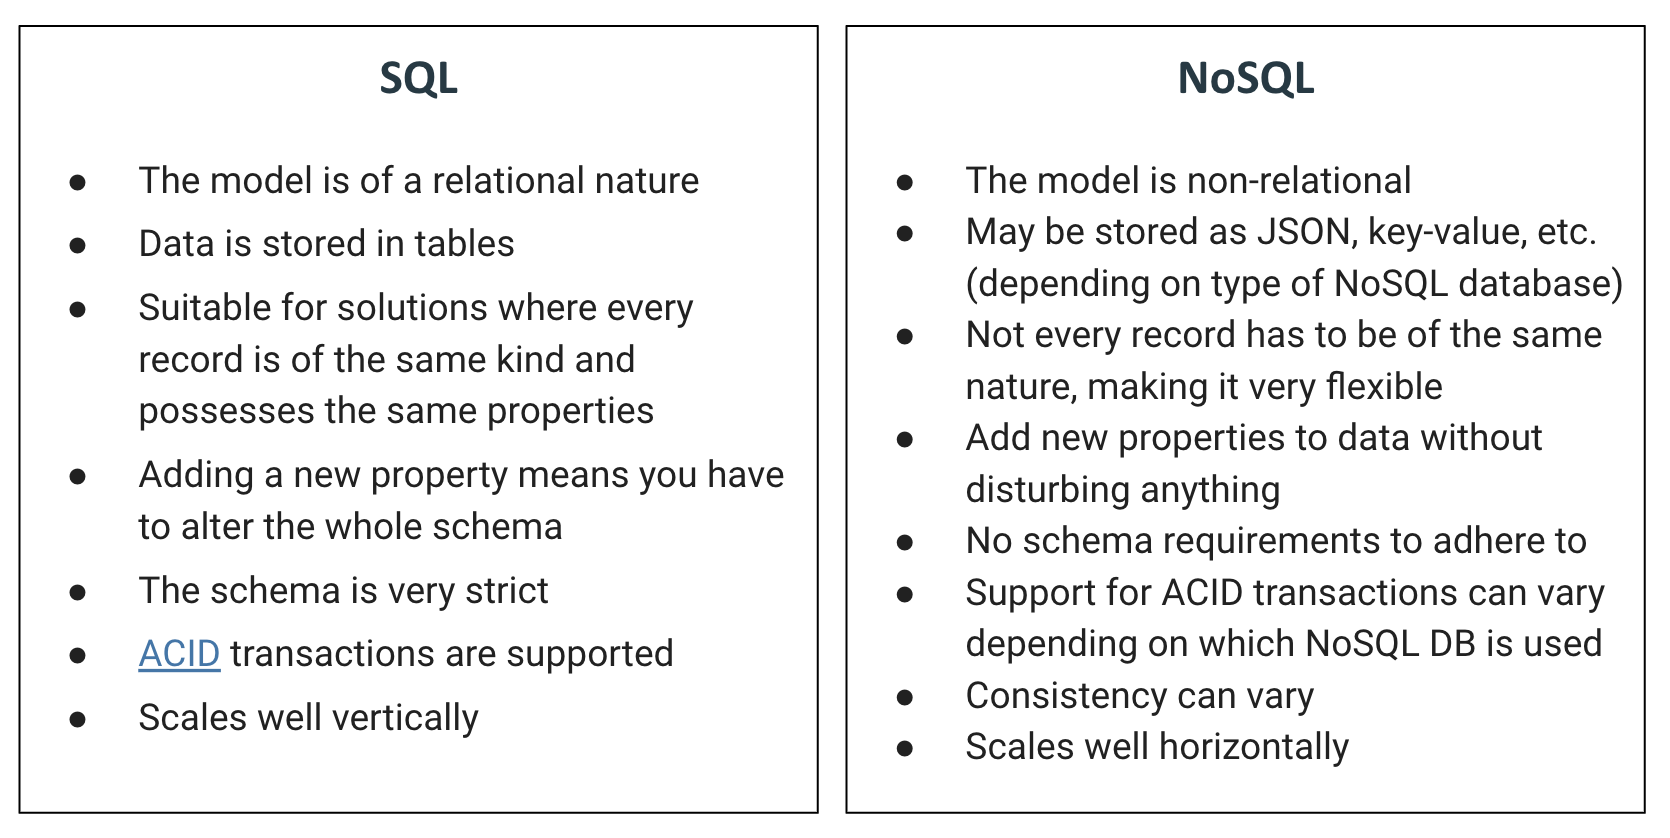

## Part II. Working with MongoDB

Even though Mongo stores each record like a JSON file, it is quite efficient. What MongoDB actually stores is a binary representation of this piece of record. In the below entry, we can see the sections as a predefined join with the outer document. We can call the sections embedded. This document structure of the database allows flexibility and speed. 


`
{
   _id: ObjectId(8af37bd7891c)
   title: 'MongoDB Lab', 
   description: 'Introductory lab on how to use MongoDB',
   by: 'Flatiron School',
   topics: ['mongodb', 'database', 'NoSQL', 'JSON'], 
   sections: [	
      {
         section:'Introduction',
         dateCreated: new Date(2019,3,1),
         reading_time_minutes: 1 
      },
      {
         user:'Installing and Running MongoDB',
         dateCreated: new Date(2019,3,1),
         reading_time_minutes: 5
      }
      {
         user:'Examining a Sample MongoDB Record',
         dateCreated: new Date(2019,3,1),
         reading_time_minutes: 8
      }
   ]
}
`

#### Creating a Mongo Client on the current instance

In [1]:
import tweepy
import json 

In [2]:
# step 1 - connect to a host and a port. When we type in mongo in the terminal, we have 
# connected to the default host and port

# we are going to create a Mongo Client on the mongod instance that is running

from pymongo import MongoClient
client = MongoClient()

In [3]:
# we can also explicitly specify the host and port we are connecting to 
client = MongoClient('localhost', 27017)

In [4]:
# we can also pass it a url 
# client = MongoClient('mongodb://localhost:27017/')

#### Creating and working with databases on the current instance

In [5]:
# A single instance of MongoDB can support multiple independent databases. 
# When working with PyMongo you access databases using attribute style access on MongoClient 
#instances
db = client.test_database

In [6]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'test_database')

In [7]:
# you can also access your database using dictionary style indexing 
db = client['test-database']

In [8]:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'test-database')

#### Getting a collection 
A collection is a group of documents stored in MongoDB, and can be thought of as roughly the equivalent of _a table_ in a relational database. Getting a collection in PyMongo works the same as getting a database.

In [9]:
collection = db.test_collection
# or collection = db['test_collection']

#### Documents

Data in MongoDB is represented (and stored) using JSON-style documents. In PyMongo we use dictionaries to represent documents. As an example, the following dictionary might be used to represent a tweet:

In [10]:
import datetime
post = {"author": "Elon Musk",
         "text": "Like why did you go steal Tesla’s E? Like you’re some sort of fascist army marching across the alphabet, some sort of Sesame Street robber",
         "tags": ["Tesla", "top 100 influencers", "funny"],
         "retweets":2999,
         "likes":9029}

#### Inserting documents into the db
To insert a document into a collection we can use the insert_one() method

In [11]:
posts = db.posts
post_id = posts.insert_one(post).inserted_id
post_id

ObjectId('5ce2b3577a0b257f8ab8b718')

When a document is inserted a special key, "_id", is automatically added if the document doesn’t already contain an "_id" key. The value of "_id" must be unique across the collection. insert_one() returns an instance of InsertOneResult. For more information on "_id", see the documentation on _id.

After inserting the first document, the posts collection has actually been created on the server. We can verify this by listing all of the collections in our database

In [12]:
db.list_collection_names()

['posts']

In [15]:
# we can use find_one() to retrieve only one instance in the database
posts.find_one({})

{'_id': ObjectId('5ce2934ca6a8999efd28b7ff'),
 'author': 'Elon Musk',
 'text': 'Like why did you go steal Tesla’s E? Like you’re some sort of fascist army marching across the alphabet, some sort of Sesame Street robber',
 'tags': ['Tesla', 'top 100 influencers', 'funny'],
 'date': datetime.datetime(2019, 5, 20, 11, 44, 26, 330000)}

In [ ]:
posts.find_one({}),{'author':0}

#### Inserting multiple entries

In [19]:
post_2 = {"author": "Donald Trump",
         "text": "SEE YOU IN COURT THE SECURITY OF OUR NATION IS AT STAKE",
         "tags": ["politics","trump"],
         "date": datetime.datetime.utcnow(),
         "likes":640977,
         "retweets":86255}

post_3 = {"author": "Donald Trump",
         "text": "You are witnessing the single worst witch hunt in the US led by some very bad and conflicted people",
         "tags": ["Tesla", "top 100 influencers", "funny"],
         "hashtag": ["MAGA"],
         "date": datetime.datetime.utcnow(),
         "likes":119500,
         "retweets":31990}


In [20]:
tweets = [post_2,post_3]

In [21]:
post_id_2 = posts.insert_many(tweets)

In [25]:
post_id_2.inserted_ids

[ObjectId('5ce2b4ce7a0b257f8ab8b719'), ObjectId('5ce2b4ce7a0b257f8ab8b71a')]

#### Querying this database 
The syntax for querying is similar to the one above,
`db.collection.find(query, projection)`


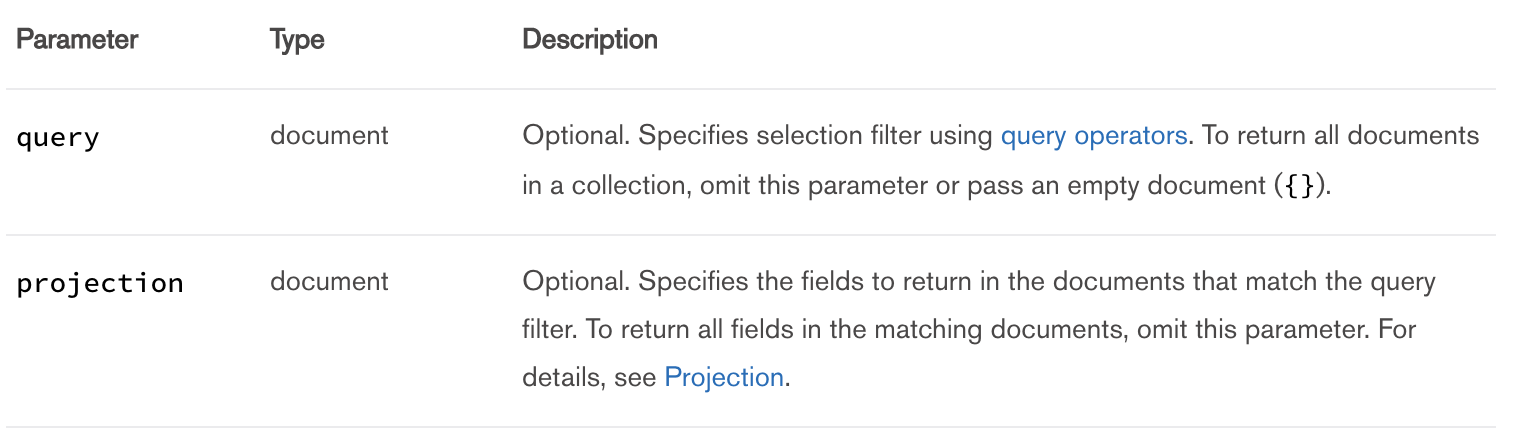

In [26]:
for post in posts.find({}, {'_id': 1, 'name': 1, 'text': 1}):
    print(post)

{'_id': ObjectId('5ce2934ca6a8999efd28b7ff'), 'text': 'Like why did you go steal Tesla’s E? Like you’re some sort of fascist army marching across the alphabet, some sort of Sesame Street robber'}
{'_id': ObjectId('5ce2b3577a0b257f8ab8b718'), 'text': 'Like why did you go steal Tesla’s E? Like you’re some sort of fascist army marching across the alphabet, some sort of Sesame Street robber'}
{'_id': ObjectId('5ce2b4ce7a0b257f8ab8b719'), 'text': 'SEE YOU IN COURT THE SECURITY OF OUR NATION IS AT STAKE'}
{'_id': ObjectId('5ce2b4ce7a0b257f8ab8b71a'), 'text': 'You are witnessing the single worst witch hunt in the US led by some very bad and conflicted people'}


In [28]:
for post in posts.find({}, {'text': 0}):
    print(post)

{'_id': ObjectId('5ce2934ca6a8999efd28b7ff'), 'author': 'Elon Musk', 'tags': ['Tesla', 'top 100 influencers', 'funny'], 'date': datetime.datetime(2019, 5, 20, 11, 44, 26, 330000)}
{'_id': ObjectId('5ce2b3577a0b257f8ab8b718'), 'author': 'Elon Musk', 'tags': ['Tesla', 'top 100 influencers', 'funny'], 'retweets': 2999, 'likes': 9029}
{'_id': ObjectId('5ce2b4ce7a0b257f8ab8b719'), 'author': 'Donald Trump', 'tags': ['politics', 'trump'], 'date': datetime.datetime(2019, 5, 20, 14, 7, 22, 504000), 'likes': 640977, 'retweets': 86255}
{'_id': ObjectId('5ce2b4ce7a0b257f8ab8b71a'), 'author': 'Donald Trump', 'tags': ['Tesla', 'top 100 influencers', 'funny'], 'hashtag': ['MAGA'], 'date': datetime.datetime(2019, 5, 20, 14, 7, 22, 504000), 'likes': 119500, 'retweets': 31990}


In [30]:
# query and filter results 
for post in posts.find({'author': 'Elon Musk'}):
    print(post)

{'_id': ObjectId('5ce2934ca6a8999efd28b7ff'), 'author': 'Elon Musk', 'text': 'Like why did you go steal Tesla’s E? Like you’re some sort of fascist army marching across the alphabet, some sort of Sesame Street robber', 'tags': ['Tesla', 'top 100 influencers', 'funny'], 'date': datetime.datetime(2019, 5, 20, 11, 44, 26, 330000)}
{'_id': ObjectId('5ce2b3577a0b257f8ab8b718'), 'author': 'Elon Musk', 'text': 'Like why did you go steal Tesla’s E? Like you’re some sort of fascist army marching across the alphabet, some sort of Sesame Street robber', 'tags': ['Tesla', 'top 100 influencers', 'funny'], 'retweets': 2999, 'likes': 9029}


#### Deleting records 

In [31]:
posts.delete_one({'author': 'Elon Musk'})


In [33]:
for post in posts.find({}):
    print(post)

{'_id': ObjectId('5ce2b3577a0b257f8ab8b718'), 'author': 'Elon Musk', 'text': 'Like why did you go steal Tesla’s E? Like you’re some sort of fascist army marching across the alphabet, some sort of Sesame Street robber', 'tags': ['Tesla', 'top 100 influencers', 'funny'], 'retweets': 2999, 'likes': 9029}
{'_id': ObjectId('5ce2b4ce7a0b257f8ab8b719'), 'author': 'Donald Trump', 'text': 'SEE YOU IN COURT THE SECURITY OF OUR NATION IS AT STAKE', 'tags': ['politics', 'trump'], 'date': datetime.datetime(2019, 5, 20, 14, 7, 22, 504000), 'likes': 640977, 'retweets': 86255}
{'_id': ObjectId('5ce2b4ce7a0b257f8ab8b71a'), 'author': 'Donald Trump', 'text': 'You are witnessing the single worst witch hunt in the US led by some very bad and conflicted people', 'tags': ['Tesla', 'top 100 influencers', 'funny'], 'hashtag': ['MAGA'], 'date': datetime.datetime(2019, 5, 20, 14, 7, 22, 504000), 'likes': 119500, 'retweets': 31990}
